In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,29,4991,4900,62,25,4991,4904,62,35
1,1,Andhra Pradesh,1637,886418,877639,7142,1522,886557,877893,7142,28
2,3,Arunachal Pradesh,46,16815,16713,56,38,16816,16722,56,12
3,4,Assam,2663,216919,213179,1077,2568,216940,213295,1077,18
4,5,Bihar,3143,258176,253569,1464,2923,258414,254023,1468,10
5,6,Chandigarh,171,20623,20122,330,146,20639,20162,331,04
6,7,Chhattisgarh,5798,294949,285566,3585,5638,295509,286277,3594,22
7,8,Dadra and Nagar Haveli and Daman and Diu,11,3393,3380,2,10,3393,3381,2,26
8,10,Delhi,2147,633049,620128,10774,2120,633276,620374,10782,07
9,11,Goa,865,52657,51036,756,865,52712,51090,757,30


In [3]:
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
32,33,Tripura,37,33339,32911,391,40,33342,32911,391,16
33,35,Uttarakhand,2005,95192,91565,1622,1876,95354,91852,1626,05
34,36,Uttar Pradesh,7873,597628,581164,8591,7717,597823,581509,8597,09
35,37,West Bengal,6675,566482,549727,10080,6565,566898,550244,10089,19
36,11111,,192308,10610883,10265706,152869,188688,10625428,10283708,153032,


In [4]:
new_cases = df.iloc[:,1:2]
new_cases['New cases'] = df['new_positive']- df['positive']
new_cases['New deaths'] = df['new_death']- df['death']
new_cases['Cured'] = df['new_cured']- df['cured']
new_cases.to_excel("22ndJan.xlsx") 

In [ ]:
a = new_cases.drop([36])
a

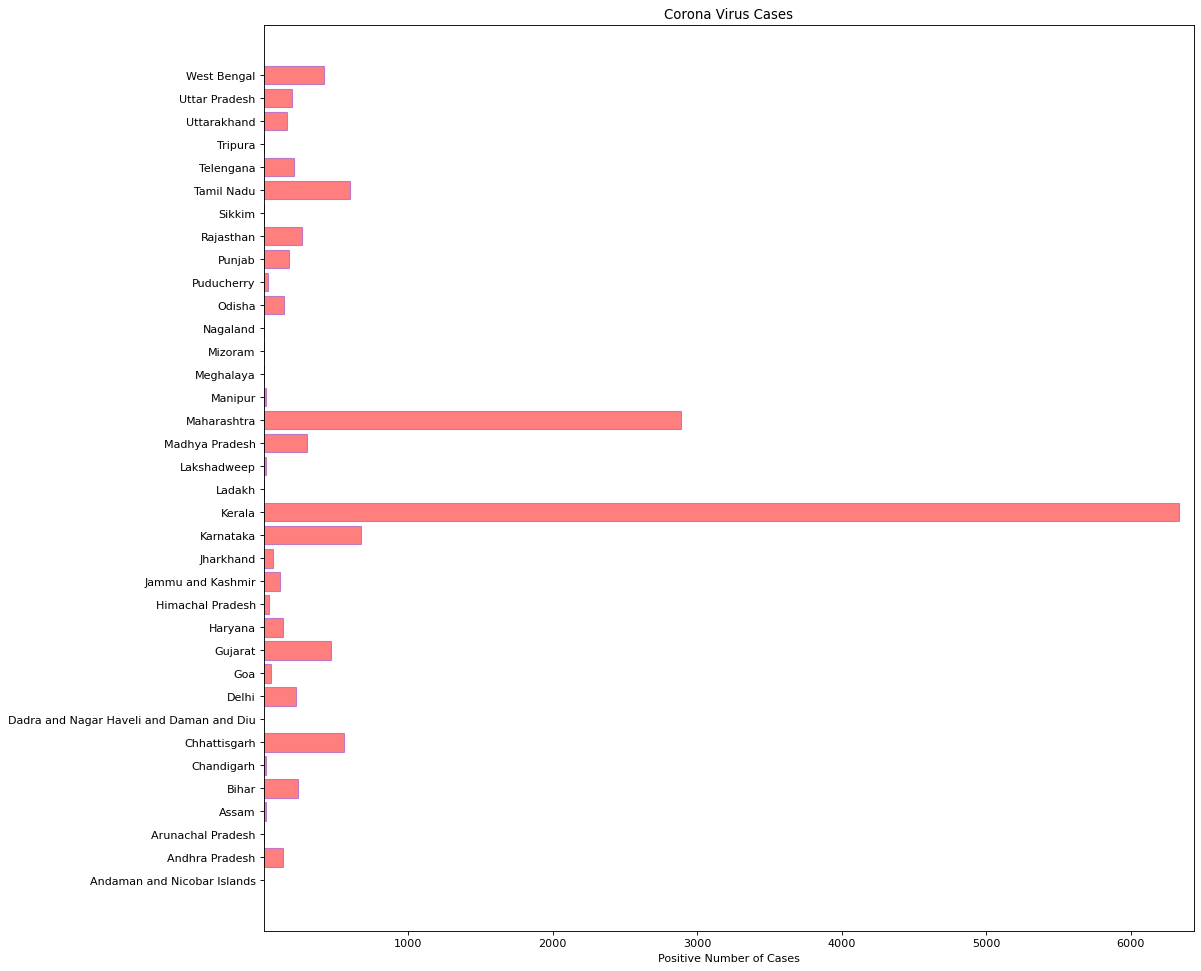

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
total_states = np.arange(len(a['state_name']))
plt.barh(total_states,a['New cases'], align='center', alpha=0.5,  
                 color=(1,0,0),  
                 edgecolor=(0.5,0.2,0.8))
    
plt.yticks(total_states, a['state_name'])  
plt.xlim(1,max(a['New cases'])+100) 
plt.xlabel('Positive Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()

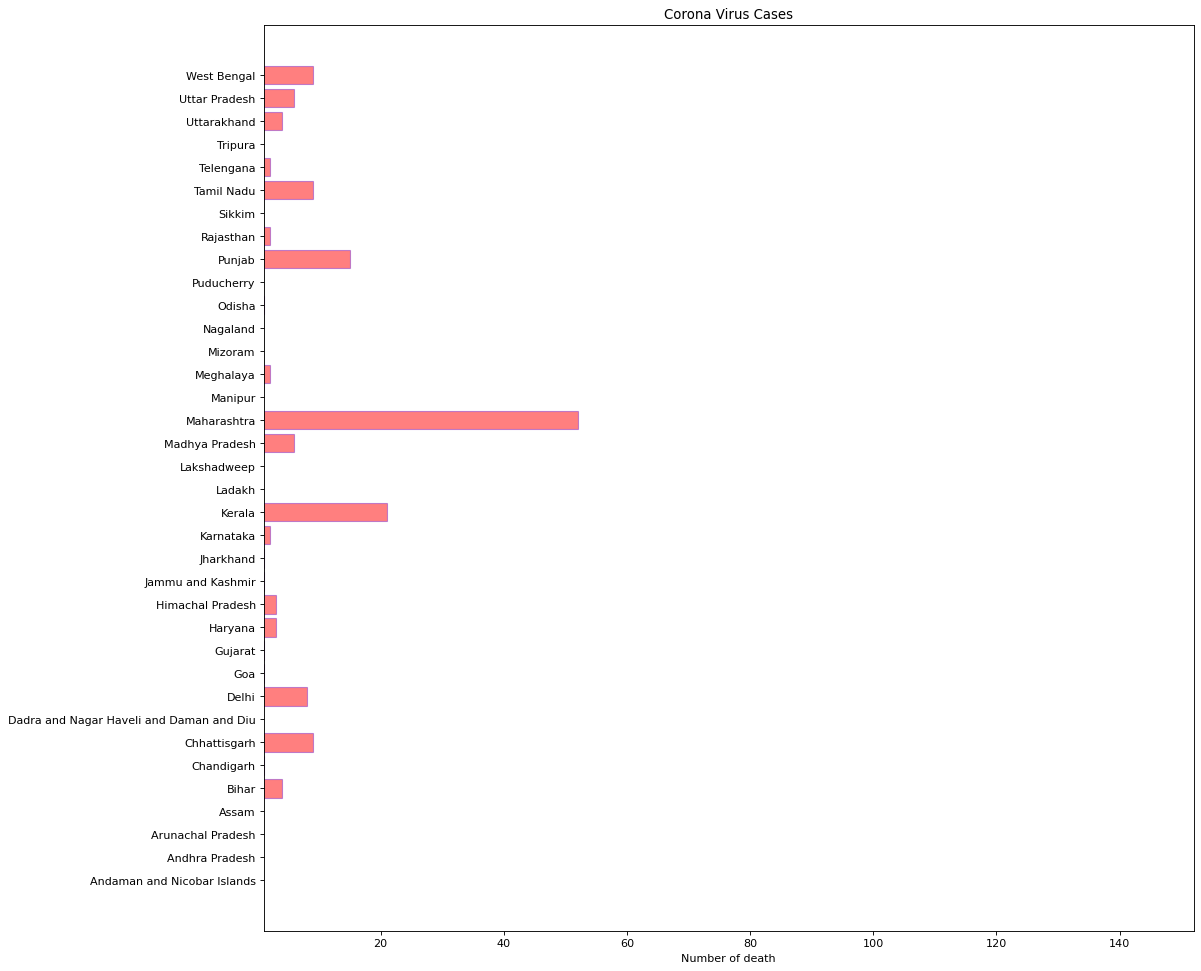

In [10]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
total_states = np.arange(len(a['state_name']))
plt.barh(total_states,a['New deaths'], align='center', alpha=0.5,  
                 color=(1,0,0),  
                 edgecolor=(0.5,0.2,0.8))
    
plt.yticks(total_states, a['state_name'])  
plt.xlim(1,max(a['New deaths'])+100) 
plt.xlabel('Number of death')  
plt.title('Corona Virus Cases')  
plt.show()

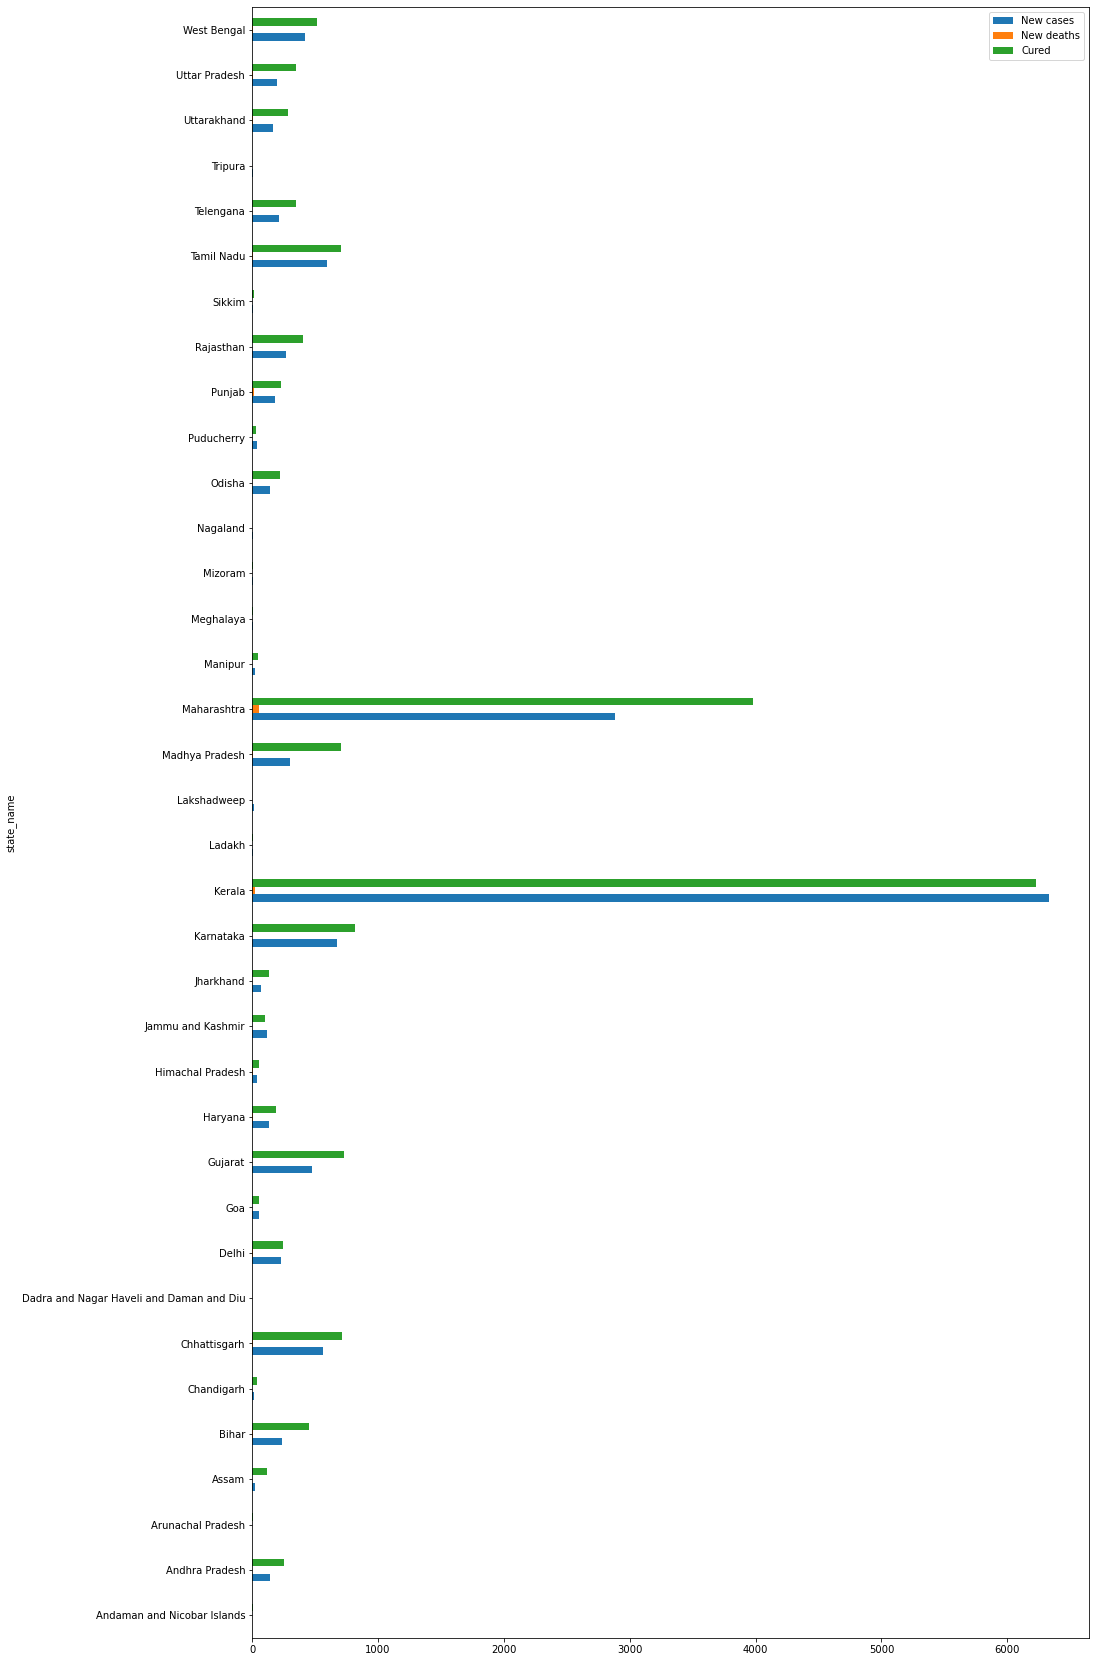

In [11]:
df1=a.set_index('state_name',drop=True)
df1.plot.barh(figsize=(15,30))